In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
#data = pd.read_csv("./inputs/owid-covid-data.csv")

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60121 entries, 0 to 60120
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               59778 non-null  object 
 1   continent                              59419 non-null  object 
 2   location                               60121 non-null  object 
 3   date                                   60121 non-null  object 
 4   total_cases                            59536 non-null  float64
 5   new_cases                              59529 non-null  float64
 6   new_cases_smoothed                     58574 non-null  float64
 7   total_deaths                           51103 non-null  float64
 8   new_deaths                             51102 non-null  float64
 9   new_deaths_smoothed                    58574 non-null  float64
 10  total_cases_per_million                59193 non-null  float64
 11  ne

In [7]:
data2 = data[["location","date","total_cases"]]

In [8]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [9]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60121 entries, 0 to 60120
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     60121 non-null  object        
 1   date         60121 non-null  datetime64[ns]
 2   total_cases  59536 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [10]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [11]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [12]:
data2.days.max()

380.0

In [13]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [14]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [15]:
data2= data2.drop(columns=["date","year"], index=1)

In [16]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [17]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [18]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60115,Zimbabwe,375.0,21477.0,10,1
60116,Zimbabwe,376.0,22297.0,11,1
60117,Zimbabwe,377.0,23239.0,12,1
60118,Zimbabwe,378.0,24256.0,13,1


In [19]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [20]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            60110, 60111, 60112, 60113, 60114, 60115, 60116, 60117, 60118,
            60119],
           dtype='int64', length=60120)

In [21]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60115,Zimbabwe,375.0,21477.0,10,1
60116,Zimbabwe,376.0,22297.0,11,1
60117,Zimbabwe,377.0,23239.0,12,1
60118,Zimbabwe,378.0,24256.0,13,1


In [22]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
60115,Zimbabwe,375.0,21477.0,10,1
60116,Zimbabwe,376.0,22297.0,11,1
60117,Zimbabwe,377.0,23239.0,12,1
60118,Zimbabwe,378.0,24256.0,13,1


In [23]:
data2.days.max()

380.0

,location,days,total_cases,day,month
35007,Mexico,150.0,87512.0,30,5
9691,Canada,150.0,91681.0,30,5
10927,Chile,150.0,118720.0,30,5
25351,Iran,150.0,148950.0,30,5
42286,Peru,150.0,155671.0,30,5
55307,Turkey,150.0,163103.0,30,5
24358,India,150.0,181827.0,30,5
20500,Germany,150.0,183189.0,30,5
19211,France,150.0,190744.0,30,5
26704,Italy,150.0,232664.0,30,5


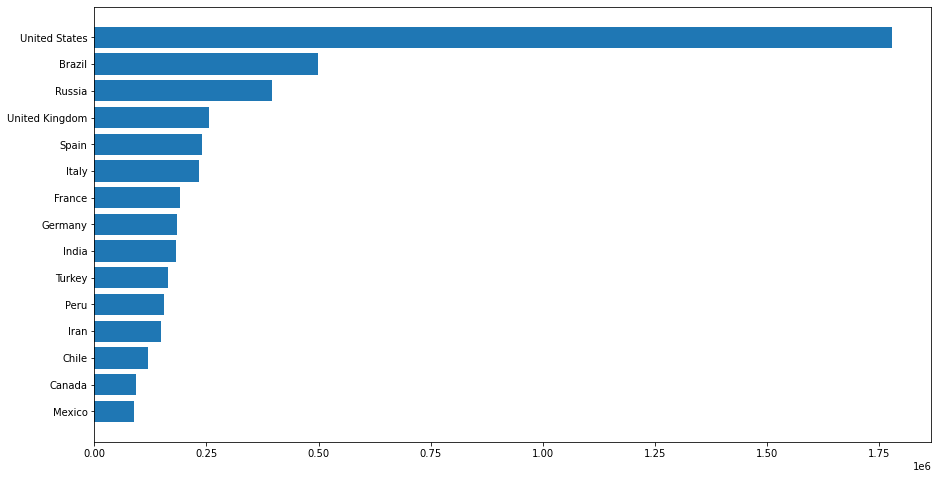

In [24]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [25]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

Text(1, 0.4, 'May')

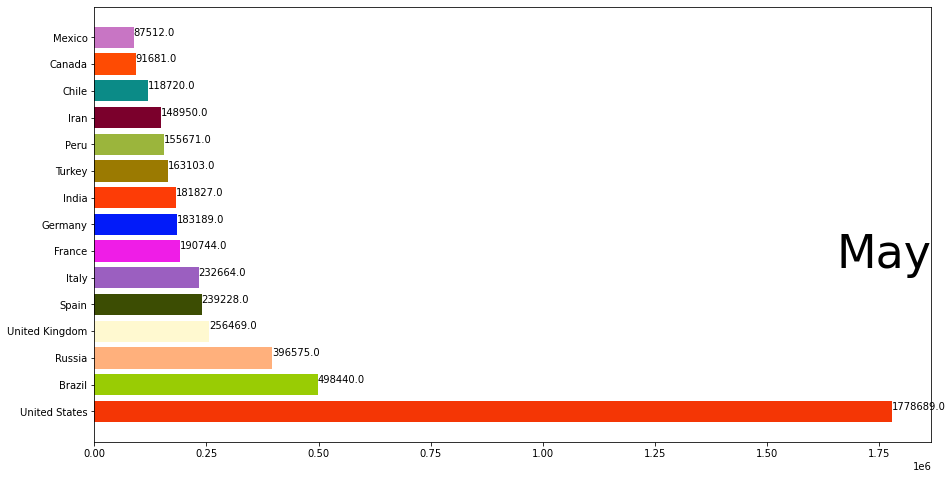

In [26]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

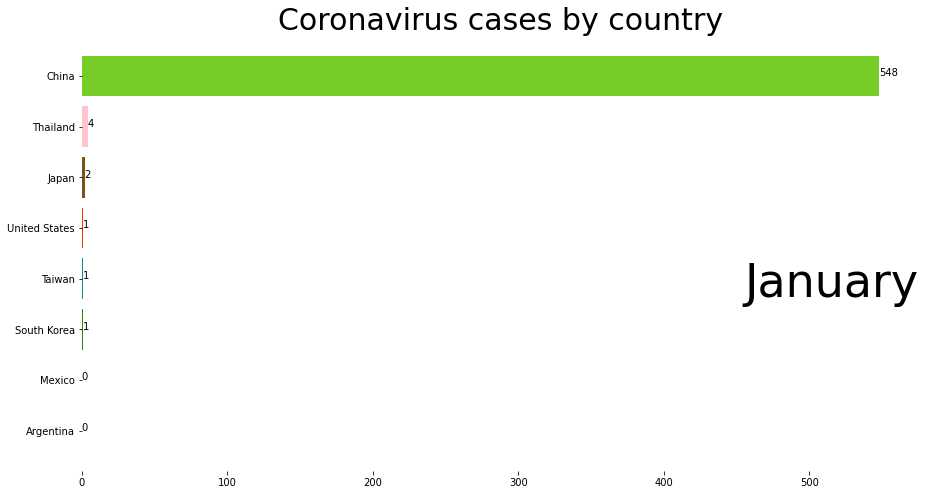

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [28]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [29]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60116,ZWE,Africa,Zimbabwe,2021-01-10,21477.0,978.0,887.429,507.0,24.0,18.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60117,ZWE,Africa,Zimbabwe,2021-01-11,22297.0,820.0,924.000,528.0,21.0,20.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60118,ZWE,Africa,Zimbabwe,2021-01-12,23239.0,942.0,863.571,551.0,23.0,19.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60119,ZWE,Africa,Zimbabwe,2021-01-13,24256.0,1017.0,921.714,589.0,38.0,22.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [36]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns=['continent','location'],
                                            values='total_cases', steps_per_period=1)

df_values

continent     Africa                                                          \
location     Algeria   Angola   Benin Botswana Burkina Faso Burundi Cameroon   
(date, )                                                                       
2020-01-01       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-02       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-03       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-04       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
2020-01-05       NaN      NaN     NaN      NaN          NaN     NaN      NaN   
...              ...      ...     ...      ...          ...     ...      ...   
2021-01-11  102369.0  18254.0  3363.0  16768.0       8279.0  1019.0  26848.0   
2021-01-12  102641.0  18343.0  3363.0  16768.0       8463.0  1019.0  27336.0   
2021-01-13  102860.0  18425.0  3413.0  16768.0       8546.0  1062.0  27336.0   
2021-01-14  103127.0  18613.0  3413.0  17365.0       8809.0  1103.0  27336.0   
2021-01-15  103127.0  18613.0  3413.0  17365.0       8809.0  1103.0  27336.0   

continent                                               ... South America  \
location   Cape Verde Central African Republic    Chad  ...        Brazil   
(date, )                                                ...                 
2020-01-01        NaN                      NaN     NaN  ...           NaN   
2020-01-02        NaN                      NaN     NaN  ...           NaN   
2020-01-03        NaN                      NaN     NaN  ...           NaN   
2020-01-04        NaN                      NaN     NaN  ...           NaN   
2020-01-05        NaN                      NaN     NaN  ...           NaN   
...               ...                      ...     ...  ...           ...   
2021-01-11    12433.0                   4973.0  2589.0  ...     8131612.0   
2021-01-12    12506.0                   4973.0  2668.0  ...     8195637.0   
2021-01-13    12592.0                   4973.0  2709.0  ...     8256536.0   
2021-01-14    12664.0                   4973.0  2773.0  ...     8324294.0   
2021-01-15    12664.0                   4973.0  2773.0  ...     8324294.0   

continent                                                               \
location       Chile   Colombia   Ecuador  Guyana  Paraguay       Peru   
(date, )                                                                 
2020-01-01       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-02       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-03       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-04       NaN        NaN       NaN     NaN       NaN        NaN   
2020-01-05       NaN        NaN       NaN     NaN       NaN        NaN   
...              ...        ...       ...     ...       ...        ...   
2021-01-11  645892.0  1801903.0  221506.0  6588.0  116535.0  1035184.0   
2021-01-12  649135.0  1816082.0  222567.0  6653.0  117590.0  1037350.0   
2021-01-13  652525.0  1831980.0  224315.0  6696.0  118592.0  1040231.0   
2021-01-14  656712.0  1849101.0  226002.0  6745.0  119640.0  1040231.0   
2021-01-15  656712.0  1849101.0  226002.0  6745.0  119640.0  1040231.0   

continent                               
location   Suriname  Uruguay Venezuela  
(date, )                                
2020-01-01      NaN      NaN       NaN  
2020-01-02      NaN      NaN       NaN  
2020-01-03      NaN      NaN       NaN  
2020-01-04      NaN      NaN       NaN  
2020-01-05      NaN      NaN       NaN  
...             ...      ...       ...  
2021-01-11   7064.0  26901.0  116983.0  
2021-01-12   7178.0  27846.0  117299.0  
2021-01-13   7247.0  28475.0  117811.0  
2021-01-14   7300.0  29989.0  118415.0  
2021-01-15   7300.0  29989.0  118415.0  

[381 rows x 190 columns]

continent   Africa                                                      \
location   Algeria Angola Benin Botswana Burkina Faso Burundi Cameroon   
(date, )                                                                 
2020-01-01     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-02     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-03     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-04     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
2020-01-05     NaN    NaN   NaN      NaN          NaN     NaN      NaN   
...            ...    ...   ...      ...          ...     ...      ...   
2021-01-11   113.0   78.0  40.0     76.0         58.0    25.0     85.0   
2021-01-12   113.0   78.0  40.0     76.0         58.0    25.0     85.0   
2021-01-13   112.0   78.0  40.0     76.0         58.0    25.0     85.0   
2021-01-14   112.0   78.0  40.0     76.0         58.0    25.0     85.0   
2021-01-15   116.0   82.0  44.0     80.0         62.0    29.0     89.0   

continent                                             ... South America  \
location   Cape Verde Central African Republic  Chad  ...        Brazil   
(date, )                                              ...                 
2020-01-01        NaN                      NaN   NaN  ...           NaN   
2020-01-02        NaN                      NaN   NaN  ...           NaN   
2020-01-03        NaN                      NaN   NaN  ...           NaN   
2020-01-04        NaN                      NaN   NaN  ...           NaN   
2020-01-05        NaN                      NaN   NaN  ...           NaN   
...               ...                      ...   ...  ...           ...   
2021-01-11       67.0                     46.0  37.0  ...         188.0   
2021-01-12       67.0                     46.0  37.0  ...         188.0   
2021-01-13       67.0                     46.0  37.0  ...         188.0   
2021-01-14       67.0                     46.0  38.0  ...         188.0   
2021-01-15       71.0                     50.0  42.0  ...         188.0   

continent                                                                   \
location    Chile Colombia Ecuador Guyana Paraguay   Peru Suriname Uruguay   
(date, )                                                                     
2020-01-01    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-02    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-03    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-04    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
2020-01-05    NaN      NaN     NaN    NaN      NaN    NaN      NaN     NaN   
...           ...      ...     ...    ...      ...    ...      ...     ...   
2021-01-11  166.0    180.0   144.0   52.0    116.0  173.0     53.0    86.0   
2021-01-12  166.0    180.0   144.0   52.0    117.0  173.0     54.0    86.0   
2021-01-13  166.0    180.0   144.0   52.0    117.0  173.0     54.0    87.0   
2021-01-14  166.0    180.0   144.0   52.0    117.0  173.0     54.0    89.0   
2021-01-15  167.0    181.0   147.0   56.0    121.0  174.0     58.0    93.0   

continent             
location   Venezuela  
(date, )              
2020-01-01       NaN  
2020-01-02       NaN  
2020-01-03       NaN  
2020-01-04       NaN  
2020-01-05       NaN  
...              ...  
2021-01-11     117.0  
2021-01-12     116.0  
2021-01-13     116.0  
2021-01-14     116.0  
2021-01-15     120.0  

[381 rows x 190 columns]

In [37]:
df_values = df_values.fillna(0)
df_values

continent     Africa                                                          \
location     Algeria   Angola   Benin Botswana Burkina Faso Burundi Cameroon   
(date, )                                                                       
2020-01-01       0.0      0.0     0.0      0.0          0.0     0.0      0.0   
2020-01-02       0.0      0.0     0.0      0.0          0.0     0.0      0.0   
2020-01-03       0.0      0.0     0.0      0.0          0.0     0.0      0.0   
2020-01-04       0.0      0.0     0.0      0.0          0.0     0.0      0.0   
2020-01-05       0.0      0.0     0.0      0.0          0.0     0.0      0.0   
...              ...      ...     ...      ...          ...     ...      ...   
2021-01-11  102369.0  18254.0  3363.0  16768.0       8279.0  1019.0  26848.0   
2021-01-12  102641.0  18343.0  3363.0  16768.0       8463.0  1019.0  27336.0   
2021-01-13  102860.0  18425.0  3413.0  16768.0       8546.0  1062.0  27336.0   
2021-01-14  103127.0  18613.0  3413.0  17365.0       8809.0  1103.0  27336.0   
2021-01-15  103127.0  18613.0  3413.0  17365.0       8809.0  1103.0  27336.0   

continent                                               ... South America  \
location   Cape Verde Central African Republic    Chad  ...        Brazil   
(date, )                                                ...                 
2020-01-01        0.0                      0.0     0.0  ...           0.0   
2020-01-02        0.0                      0.0     0.0  ...           0.0   
2020-01-03        0.0                      0.0     0.0  ...           0.0   
2020-01-04        0.0                      0.0     0.0  ...           0.0   
2020-01-05        0.0                      0.0     0.0  ...           0.0   
...               ...                      ...     ...  ...           ...   
2021-01-11    12433.0                   4973.0  2589.0  ...     8131612.0   
2021-01-12    12506.0                   4973.0  2668.0  ...     8195637.0   
2021-01-13    12592.0                   4973.0  2709.0  ...     8256536.0   
2021-01-14    12664.0                   4973.0  2773.0  ...     8324294.0   
2021-01-15    12664.0                   4973.0  2773.0  ...     8324294.0   

continent                                                               \
location       Chile   Colombia   Ecuador  Guyana  Paraguay       Peru   
(date, )                                                                 
2020-01-01       0.0        0.0       0.0     0.0       0.0        0.0   
2020-01-02       0.0        0.0       0.0     0.0       0.0        0.0   
2020-01-03       0.0        0.0       0.0     0.0       0.0        0.0   
2020-01-04       0.0        0.0       0.0     0.0       0.0        0.0   
2020-01-05       0.0        0.0       0.0     0.0       0.0        0.0   
...              ...        ...       ...     ...       ...        ...   
2021-01-11  645892.0  1801903.0  221506.0  6588.0  116535.0  1035184.0   
2021-01-12  649135.0  1816082.0  222567.0  6653.0  117590.0  1037350.0   
2021-01-13  652525.0  1831980.0  224315.0  6696.0  118592.0  1040231.0   
2021-01-14  656712.0  1849101.0  226002.0  6745.0  119640.0  1040231.0   
2021-01-15  656712.0  1849101.0  226002.0  6745.0  119640.0  1040231.0   

continent                               
location   Suriname  Uruguay Venezuela  
(date, )                                
2020-01-01      0.0      0.0       0.0  
2020-01-02      0.0      0.0       0.0  
2020-01-03      0.0      0.0       0.0  
2020-01-04      0.0      0.0       0.0  
2020-01-05      0.0      0.0       0.0  
...             ...      ...       ...  
2021-01-11   7064.0  26901.0  116983.0  
2021-01-12   7178.0  27846.0  117299.0  
2021-01-13   7247.0  28475.0  117811.0  
2021-01-14   7300.0  29989.0  118415.0  
2021-01-15   7300.0  29989.0  118415.0  

[381 rows x 190 columns]

In [38]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/covid19_vert2.mp4')

CPU times: user 5min 57s, sys: 2min 33s, total: 8min 30s
Wall time: 2min 54s


In [33]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 5min 40s, sys: 2min 28s, total: 8min 9s
Wall time: 6min 58s


In [34]:
df_values2, df_ranks2 = bcr.prepare_long_data(data, index='date', columns='location',
                                            values='new_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,49.0,376.0,225.0,0.0,61.0,0.0,8704.0,157.0,20.0,1536.0,...,213173.0,715.0,39.0,0.0,0.0,373.0,1.0,1.0,868.0,820.0
2021-01-12,46.0,656.0,272.0,96.0,89.0,0.0,13783.0,355.0,16.0,1575.0,...,225332.0,945.0,52.0,0.0,0.0,316.0,5.0,2.0,1161.0,942.0
2021-01-13,0.0,707.0,219.0,136.0,82.0,0.0,12725.0,485.0,10.0,1917.0,...,230209.0,629.0,53.0,0.0,0.0,512.0,1.0,2.0,1343.0,1017.0


In [35]:
'''
import plotly.express as px

data = data.fillna(0)
fig = px.line(data, x="date", y="location", color='new_cases')
fig.show()
'''

'\nimport plotly.express as px\n\ndata = data.fillna(0)\nfig = px.line(data, x="date", y="location", color=\'new_cases\')\nfig.show()\n'